# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix


## Load Dataset

In [ ]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


## Data preprocessing (10%)

### Feature scaling

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 70000)


### Select two classes

In [ ]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)
indices = np.where((y == '0') | (y == '8'))[0] #8 bag and 0 T-shirt/Top

X=X[indices]
y=y[indices]

### Split the data into Train set and Test set



In [ ]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)

# Shuffle the data indices
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# Apply the shuffling to the features (X) and labels (y)
X = X[indices]
y = y[indices]

# Define the size of the training set (80% of the data)
train_size = int(0.8 * X.shape[0])

# Extract the training set
X_train = X[:train_size].T
Y_train = y[:train_size].reshape(-1, 1)

# Extract the test set
X_test = X[train_size:].T
Y_test = y[train_size:]


### Test yourself

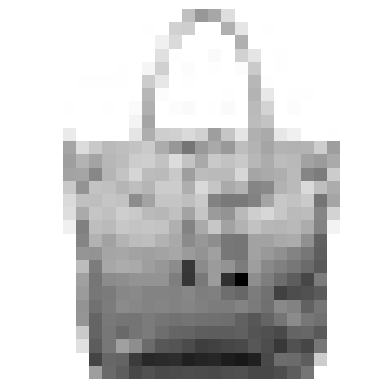

'8'

In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Loss function (20%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

In [ ]:
# Logarithmic loss function, commonly used for evaluating binary classification models

def log_loss(y_prob, y_true):
    """
    Compute the logarithmic loss between predicted probabilities (y_prob) and true labels (y_true).

    Parameters:
    - y_prob: Predicted probabilities.
    - y_true: True labels (0 or 1).

    Returns:
    - Logarithmic loss value.
    """
    epsilon = 1e-15
    # Clip predicted probabilities to avoid numerical instability
    y_prob = np.clip(y_prob, epsilon, 1 - epsilon)

    # Calculate the log loss
    loss = - (y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

    return loss


## NN Hyper Parameters

In [ ]:
# Neural network hyperparameters and architecture configuration

# Number of neurons in the input layer (features in each data sample)
input_layer = X_train.shape[0]  # For example, if input data is 28x28 pixels, input_layer = 28 * 28 = 784

# Number of neurons in the hidden layer
hidden_layer = 128  # Adjustable based on the complexity of the problem and available computational resources

# Learning rate for gradient descent optimization
learning_rate = 0.001  # Determines the step size during parameter updates

# Number of training epochs
epochs = 100  # Number of times the entire dataset is passed through the neural network for training


## Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(128, 784)
(128, 1)
(1, 128)
(1, 1)


## Training (30%)

In [ ]:
# Training loop for a neural network

# Set the input data and labels for training
X = X_train
Y = Y_train

# Lists to store training loss and epoch number for later analysis
loss_list = []
epoch_list = []

# Number of training samples
numOfTraining = X_train.shape[1]

# Main training loop
for i in range(epochs):
    avg_epoch_loss = 0

    # Loop through each training sample
    for j in range(numOfTraining):
        # Forward propagation
        Z1 = np.dot(W1, X[:, j].reshape(-1, 1)) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        Yout = int(Y[j]) / 8  # Adjust for compatibility with the log_loss function

        # Compute loss
        loss = log_loss(A2, Yout)
        avg_epoch_loss = avg_epoch_loss + loss

        # Back propagation
        dZ2 = (A2 - Yout)
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * (1 - np.power(A1, 2))
        dW1 = np.dot(dZ1, X[:, j].reshape(-1, 1).T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)

        # Update weights
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1

    # Calculate average loss for the epoch
    avg_epoch_loss = avg_epoch_loss / numOfTraining

    # Store loss and epoch number for analysis
    loss_list.append(avg_epoch_loss)
    epoch_list.append(i)

    # Print training progress
    print("Epoch", i, " Loss:", avg_epoch_loss)


Epoch 0  Loss: [[0.5849583]]
Epoch 1  Loss: [[0.2707011]]
Epoch 2  Loss: [[0.21507387]]
Epoch 3  Loss: [[0.1816601]]
Epoch 4  Loss: [[0.16855333]]
Epoch 5  Loss: [[0.16187072]]
Epoch 6  Loss: [[0.15773381]]
Epoch 7  Loss: [[0.155981]]
Epoch 8  Loss: [[0.14807221]]
Epoch 9  Loss: [[0.14396286]]
Epoch 10  Loss: [[0.1504484]]
Epoch 11  Loss: [[0.14475393]]
Epoch 12  Loss: [[0.140262]]
Epoch 13  Loss: [[0.12911868]]
Epoch 14  Loss: [[0.13091841]]
Epoch 15  Loss: [[0.14120894]]
Epoch 16  Loss: [[0.12924136]]
Epoch 17  Loss: [[0.12068621]]
Epoch 18  Loss: [[0.11666942]]
Epoch 19  Loss: [[0.11454644]]
Epoch 20  Loss: [[0.1142173]]
Epoch 21  Loss: [[0.11697012]]
Epoch 22  Loss: [[0.11276934]]
Epoch 23  Loss: [[0.10685613]]
Epoch 24  Loss: [[0.10733435]]
Epoch 25  Loss: [[0.11412434]]
Epoch 26  Loss: [[0.11710921]]
Epoch 27  Loss: [[0.12336144]]
Epoch 28  Loss: [[0.11856509]]
Epoch 29  Loss: [[0.12751028]]
Epoch 30  Loss: [[0.12645932]]
Epoch 31  Loss: [[0.12349998]]
Epoch 32  Loss: [[0.1204700

### Loss Visualization

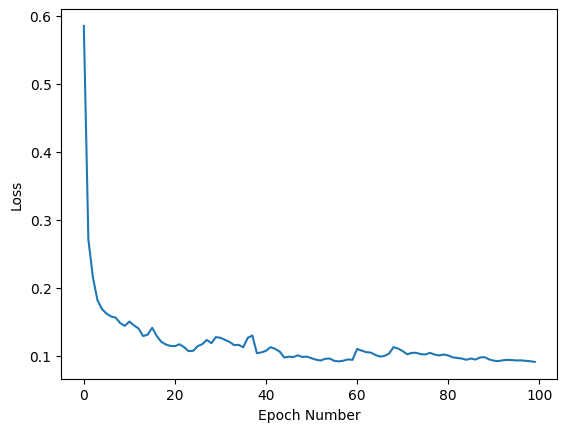

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, np.squeeze(loss_list))
plt.show()

## Results

### Test your performance (30%)

In [ ]:
# TODO: Forward batch of examples and evaluate performance on the test set

# Set the input data and labels for testing
X = X_test
Y = Y_test

# Forward propagation for the test set
Z1 = np.matmul(W1, X) + b1
A1 = np.tanh(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

# Initialize arrays to store predictions and labels for evaluation
predictions = np.zeros((1, Y.shape[0]))
labels = np.zeros((1, Y.shape[0]))

# Check predictions against the test labels
for i in range(Y.shape[0]):
    if A2[0, i] > 0.5:
        predictions[0, i] = 8  # Assume 8 as the positive class (adjust as needed)
    labels[0, i] = Y[i]

# Evaluate performance using a confusion matrix
conf_matrix = confusion_matrix(labels.T, predictions.T, labels=[0, 8])
print("Confusion Matrix:")
print(conf_matrix)

# Calculate Accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print("Accuracy:", accuracy)


Confusion Matrix:
[[1355   50]
 [  52 1343]]
Accuracy: 0.9635714285714285


### Visualize the results

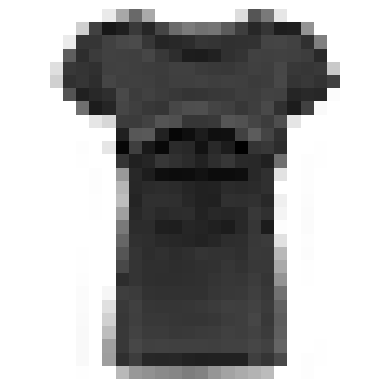

Real = 0 Predicted = 0 Prediction = 0.0019052964755091769


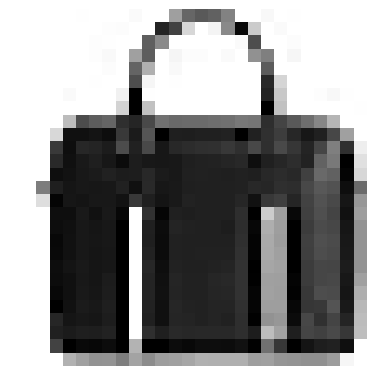

Real = 8 Predicted = 8 Prediction = 0.999671257666832


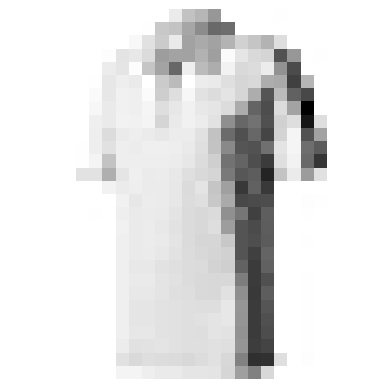

Real = 0 Predicted = 0 Prediction = 0.313404130056749


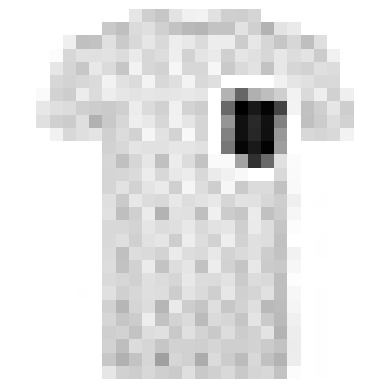

Real = 0 Predicted = 0 Prediction = 0.06330232516823295


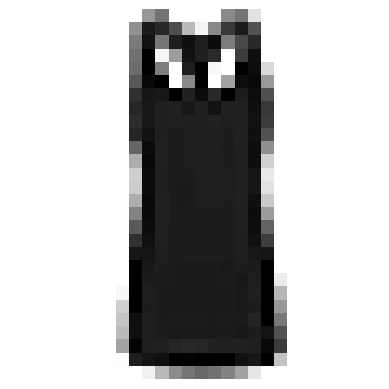

Real = 0 Predicted = 0 Prediction = 0.0025120583324491426


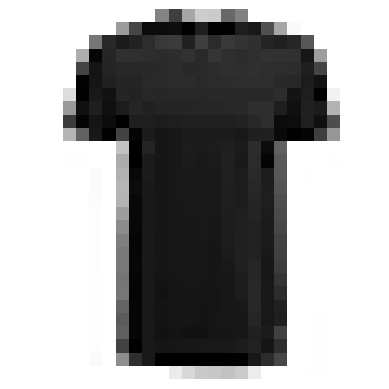

Real = 0 Predicted = 0 Prediction = 0.0019052964755091769


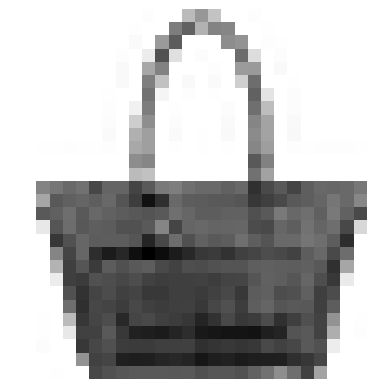

Real = 8 Predicted = 8 Prediction = 0.9995428060717062


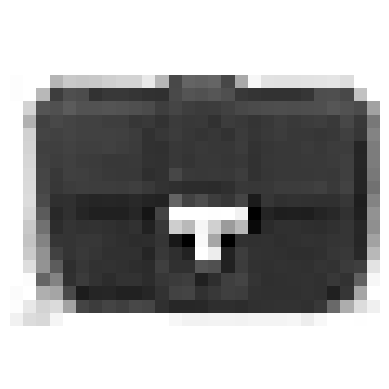

Real = 8 Predicted = 8 Prediction = 0.9966666881122813


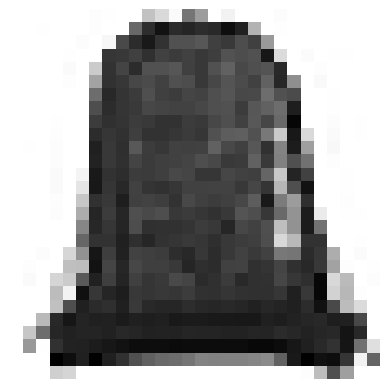

Real = 8 Predicted = 8 Prediction = 0.9592254068843135


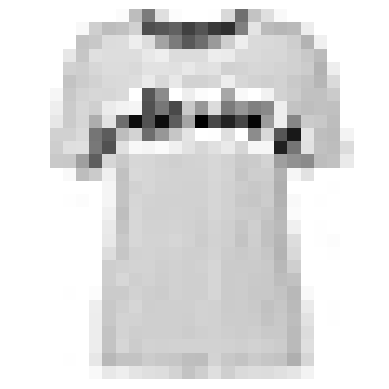

Real = 0 Predicted = 0 Prediction = 0.00015972439584240687


In [ ]:
# Visualization of model predictions on random test examples
# Ensure that plots are displayed inline
%matplotlib inline

# Import necessary libraries
from numpy import random
import matplotlib.pyplot as plt

# Plot results for a random set of test examples
for _ in range(10):
    i = random.randint(X_test.shape[1])

    # Forward propagation
    Z1 = np.matmul(W1, X_test[:, i])
    A1 = np.tanh(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)
    Yout = Y_test[i]

    # Display the image
    plt.imshow(X_test[:, i].reshape(28, 28), cmap=matplotlib.cm.binary)
    plt.axis("off")
    plt.show()

    # Predicted label and prediction probability
    predicted_label = 8 if float(A2[0, 0]) > 0.5 else 0  # Assuming 8 as the positive class
    print("Real =", int(Yout), "Predicted =", predicted_label, "Prediction =", A2[0, 0])
